# Proyek Analisis Prediktif: Prediksi Kualitas Wine

## 1. Business Understanding

Industri wine adalah salah satu industri dengan nilai ekonomi yang tinggi di seluruh dunia. Untuk menghasilkan wine berkualitas tinggi, produsen perlu memahami faktor-faktor yang mempengaruhi kualitas produk akhir. Prediksi kualitas wine dapat membantu produsen mengoptimalkan proses produksi mereka dan memastikan konsistensi kualitas produk.

### 1.1 Problem Statements

- Faktor kimia dan fisika apa yang paling mempengaruhi kualitas wine?
- Bagaimana kita dapat memprediksi kualitas wine berdasarkan atribut-atributnya
- Seberapa akurat model machine learning dalam memprediksi kualitas wine

### 1.2 Goals

- Mengidentifikasi faktor-faktor yang paling berpengaruh terhadap kualitas wine.
- Membangun model prediktif yang dapat mengklasifikasikan wine ke dalam kategori kualitas baik atau kurang baik.
- Membandingkan performa beberapa algoritma machine learning dan memilih model terbaik untuk prediksi kualitas wine.

### 1.3 Solution Statements

- Melakukan eksplorasi data untuk memahami distribusi dan korelasi antar variabel.
- Membangun beberapa model klasifikasi (Random Forest, KNN, Gradient Boosting) dan membandingkan performanya.
- Melakukan hyperparameter tuning untuk mengoptimalkan model terbaik.
- Mengevaluasi model akhir menggunakan metrik yang relevan.

## 2. Data Understanding

Kita akan menggunakan dataset Wine Quality yang tersedia secara publik. Dataset ini berisi informasi tentang atribut fisikokimia dari wine beserta penilaian kualitasnya.

### 2.1 Import Library

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# Mengatur tampilan plot
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')
%matplotlib inline

### 2.2 Load Dataset

In [2]:
# Membaca dataset
df = pd.read_csv('WineQT.csv')

# Menampilkan informasi dataset
print("Dimensi dataset:", df.shape)
df.head()

Dimensi dataset: (1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
# Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
# Statistik deskriptif
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [5]:
# Memeriksa missing values
print("Jumlah missing values per kolom:")
df.isnull().sum()

Jumlah missing values per kolom:


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


### 2.3 Eksplorasi Data

#### 2.3.1 Distribusi Target (Kualitas Wine)

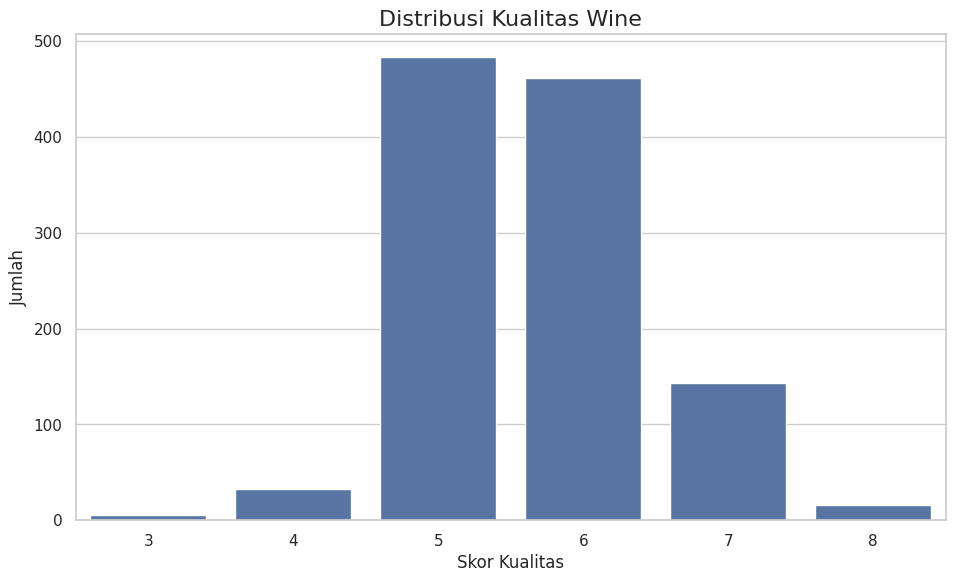

In [6]:
# Distribusi kualitas wine
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribusi Kualitas Wine', fontsize=16)
plt.xlabel('Skor Kualitas', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.savefig('images/quality_distribution.png', bbox_inches='tight')
plt.show()

#### 2.3.2 Korelasi antar Variabel

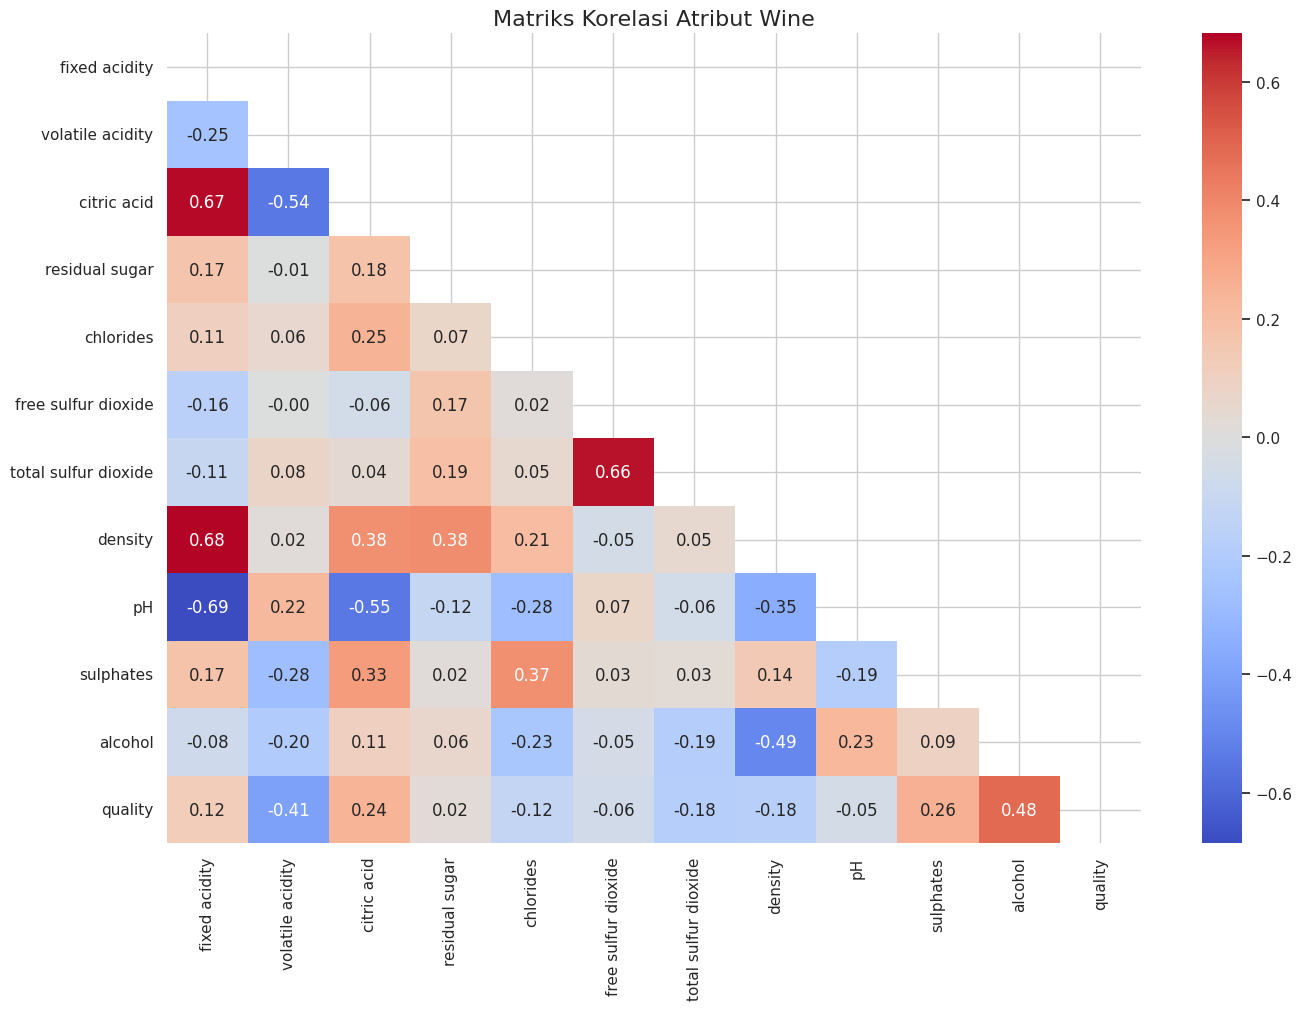

In [7]:
# Menghapus kolom Id yang tidak diperlukan untuk analisis
df = df.drop('Id', axis=1)

# Matriks korelasi
plt.figure(figsize=(14, 10))
correlation = df.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Matriks Korelasi Atribut Wine', fontsize=16)
plt.savefig('images/correlation_matrix.png', bbox_inches='tight')
plt.show()

#### 2.3.3 Visualisasi Hubungan antara Alkohol dan Kualitas Wine

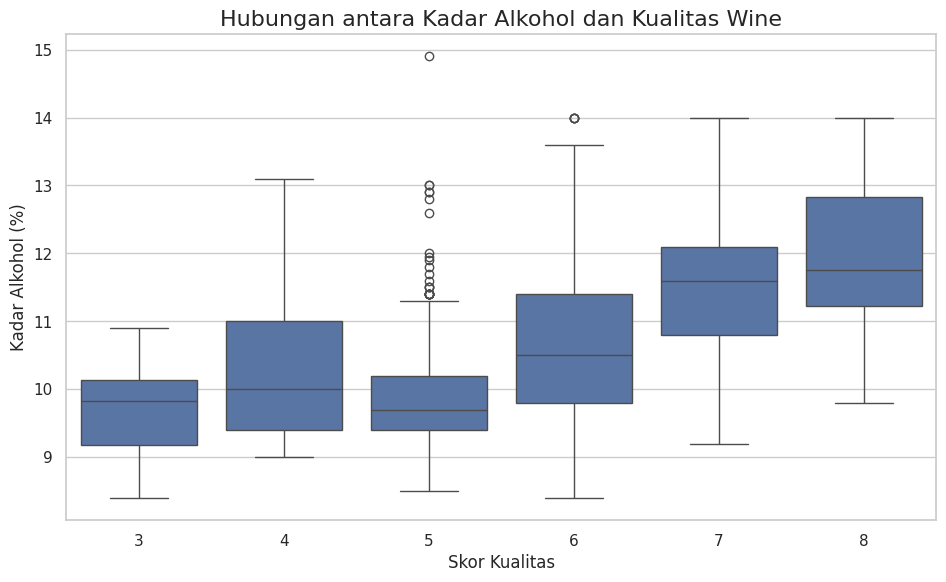

In [8]:
# Hubungan antara alkohol dan kualitas wine
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Hubungan antara Kadar Alkohol dan Kualitas Wine', fontsize=16)
plt.xlabel('Skor Kualitas', fontsize=12)
plt.ylabel('Kadar Alkohol (%)', fontsize=12)
plt.savefig('images/alcohol_vs_quality.png', bbox_inches='tight')
plt.show()

#### 2.3.4 Visualisasi Hubungan antara Volatile Acidity dan Kualitas Wine

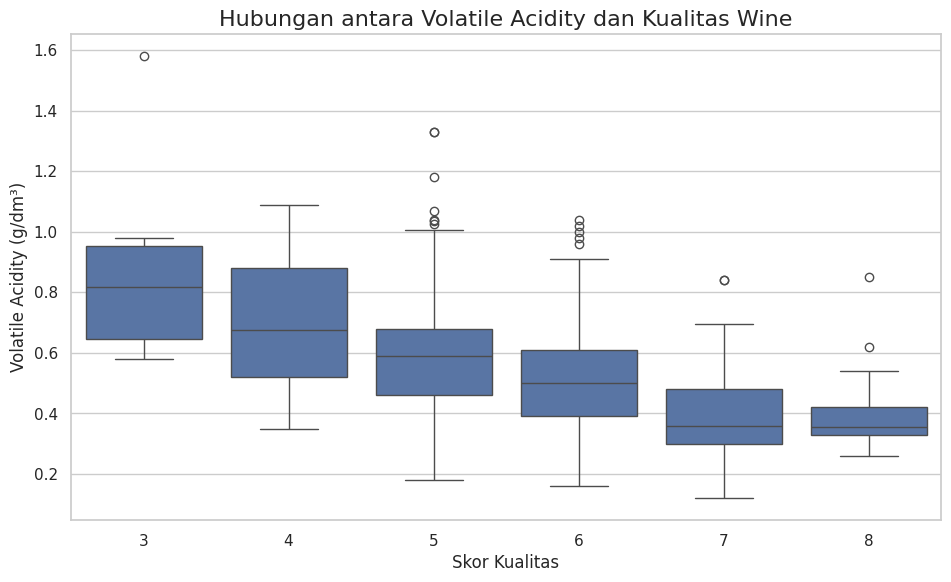

In [9]:
# Hubungan antara volatile acidity dan kualitas wine
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title('Hubungan antara Volatile Acidity dan Kualitas Wine', fontsize=16)
plt.xlabel('Skor Kualitas', fontsize=12)
plt.ylabel('Volatile Acidity (g/dm³)', fontsize=12)
plt.savefig('images/volatile_acidity_vs_quality.png', bbox_inches='tight')
plt.show()

#### 2.3.5 Analisis Multivariate

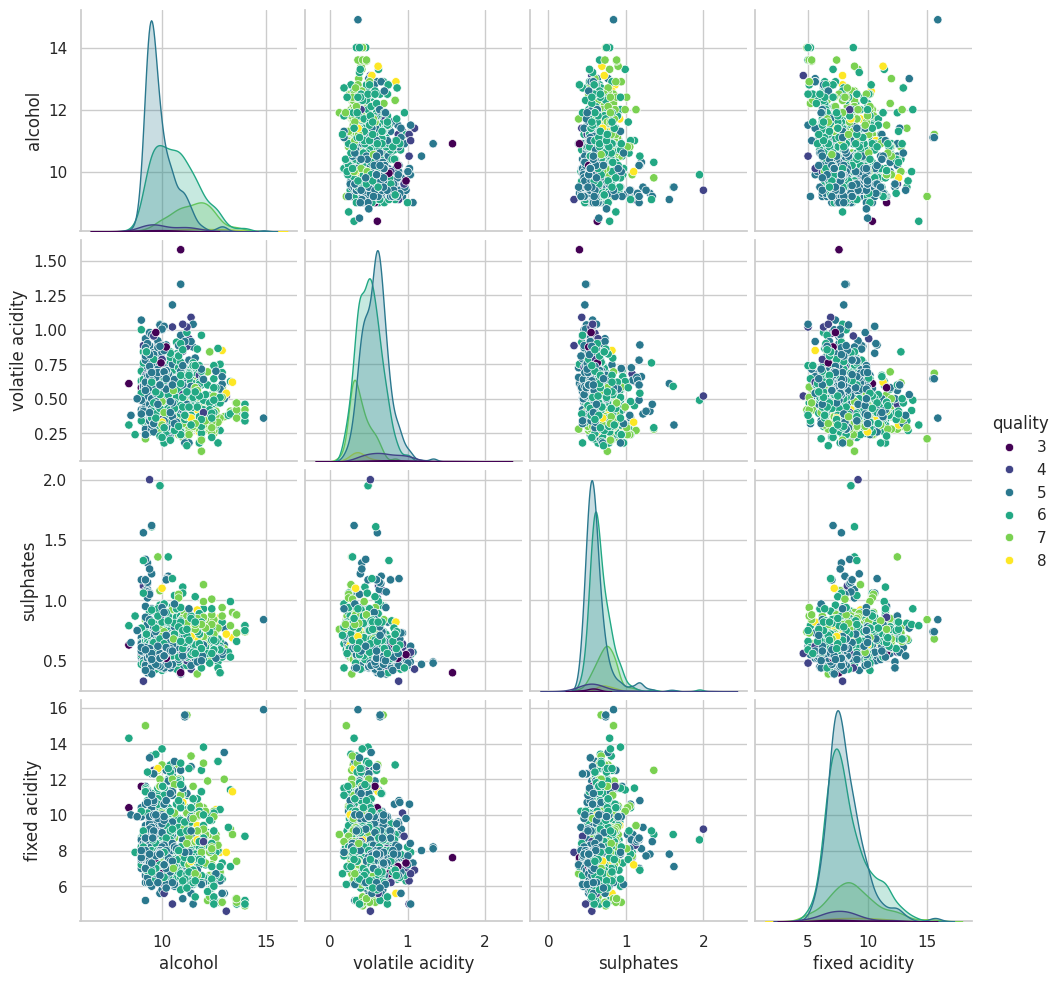

In [10]:
# Visualisasi pairplot
features = ['alcohol', 'volatile acidity', 'sulphates', 'fixed acidity', 'quality']
sns.pairplot(df[features], hue='quality', palette='viridis')
plt.savefig('images/pairplot.png', bbox_inches='tight')
plt.show()

### 2.4 Transformasi Target

Untuk menyederhanakan masalah, kita akan mengubah skor kualitas menjadi klasifikasi biner: kualitas baik (≥ 6) dan kualitas kurang baik (< 6).

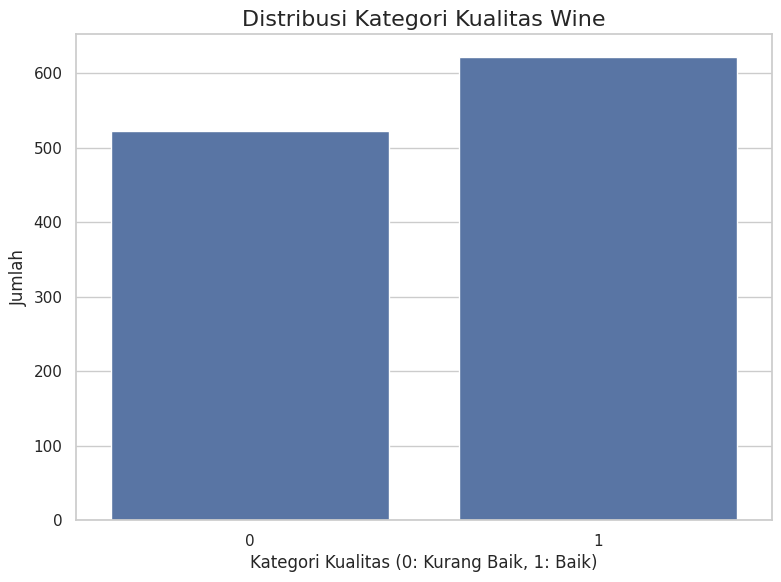

In [11]:
# Membuat variabel target biner
df['quality_category'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Visualisasi distribusi kategori kualitas
plt.figure(figsize=(8, 6))
sns.countplot(x='quality_category', data=df)
plt.title('Distribusi Kategori Kualitas Wine', fontsize=16)
plt.xlabel('Kategori Kualitas (0: Kurang Baik, 1: Baik)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.savefig('images/quality_category_distribution.png', bbox_inches='tight')
plt.show()

## 3. Data Preparation

In [12]:
# Memisahkan fitur dan target
X = df.drop(['quality', 'quality_category'], axis=1)
y = df['quality_category']

# Penskalaan fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Pembagian data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah sampel training: {X_train.shape[0]}")
print(f"Jumlah sampel testing: {X_test.shape[0]}")

Jumlah sampel training: 914
Jumlah sampel testing: 229


## 4. Modeling

Kita akan membandingkan performa beberapa algoritma klasifikasi dalam memprediksi kualitas wine.

In [13]:
# Model 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest:
Accuracy: 0.8166
nClassification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       105
           1       0.82      0.85      0.83       124

    accuracy                           0.82       229
   macro avg       0.82      0.81      0.81       229
weighted avg       0.82      0.82      0.82       229



In [14]:
# Model 2: KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("K-Nearest Neighbors:")
print(f"Accuracy: {accuracy_knn:.4f}")
print("nClassification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors:
Accuracy: 0.7336
nClassification Report:
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       105
           1       0.73      0.80      0.76       124

    accuracy                           0.73       229
   macro avg       0.73      0.73      0.73       229
weighted avg       0.73      0.73      0.73       229



In [15]:
# Model 3: Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("Gradient Boosting:")
print(f"Accuracy: {accuracy_gb:.4f}")
print("nClassification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting:
Accuracy: 0.7686
nClassification Report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.74       105
           1       0.77      0.82      0.79       124

    accuracy                           0.77       229
   macro avg       0.77      0.76      0.77       229
weighted avg       0.77      0.77      0.77       229



### 4.1 Cross Validation

Random Forest: Mean Accuracy = 0.7218, Std = 0.0261
K-Nearest Neighbors: Mean Accuracy = 0.6754, Std = 0.0392
Gradient Boosting: Mean Accuracy = 0.7314, Std = 0.0251


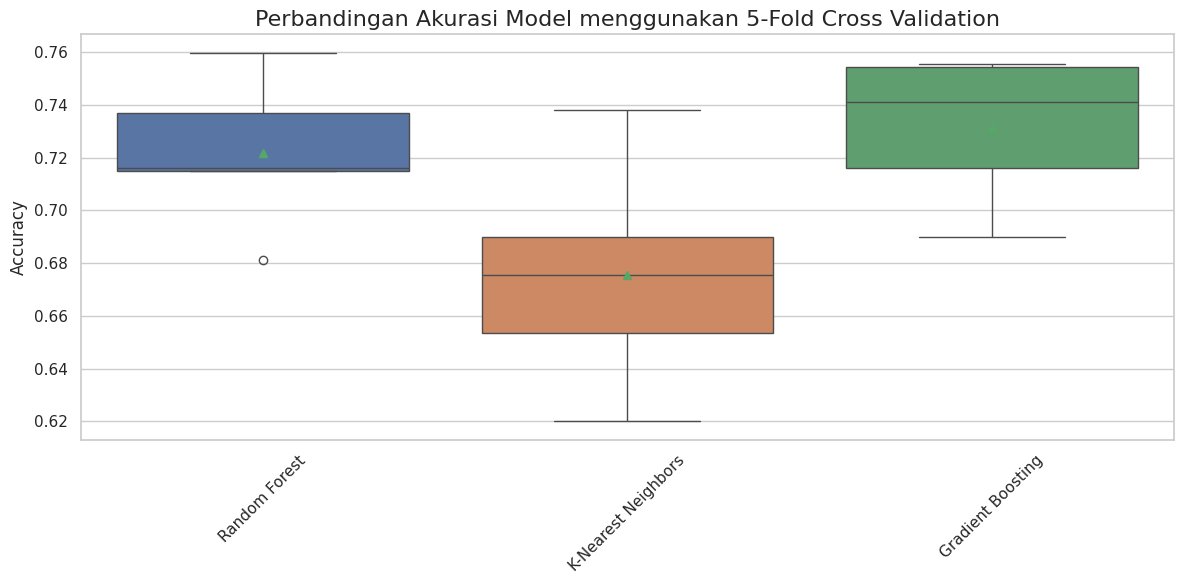

In [16]:
# Cross-validation untuk ketiga model
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Evaluasi dengan 5-fold cross-validation
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")

# Visualisasi perbandingan model
plt.figure(figsize=(12, 6))
sns.boxplot(data=[cv_results[model] for model in cv_results], showmeans=True)
plt.xticks(range(len(cv_results)), list(cv_results.keys()), rotation=45)
plt.title('Perbandingan Akurasi Model menggunakan 5-Fold Cross Validation', fontsize=16)
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig('images/model_comparison_cv.png', bbox_inches='tight')
plt.show()

### 4.2 Hyperparameter Tuning untuk Random Forest

In [22]:
# Hyperparameter tuning untuk Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Best parameters: {'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation score: 0.7789


In [18]:
# Model Random Forest Optimal
best_rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf_model.fit(X_train, y_train)
y_pred_best_rf = best_rf_model.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)

print("Random Forest Optimal:")
print(f"Accuracy: {accuracy_best_rf:.4f}")
print("nClassification Report:")
print(classification_report(y_test, y_pred_best_rf))

Random Forest Optimal:
Accuracy: 0.8035
nClassification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       105
           1       0.81      0.84      0.82       124

    accuracy                           0.80       229
   macro avg       0.80      0.80      0.80       229
weighted avg       0.80      0.80      0.80       229



## 5. Evaluation

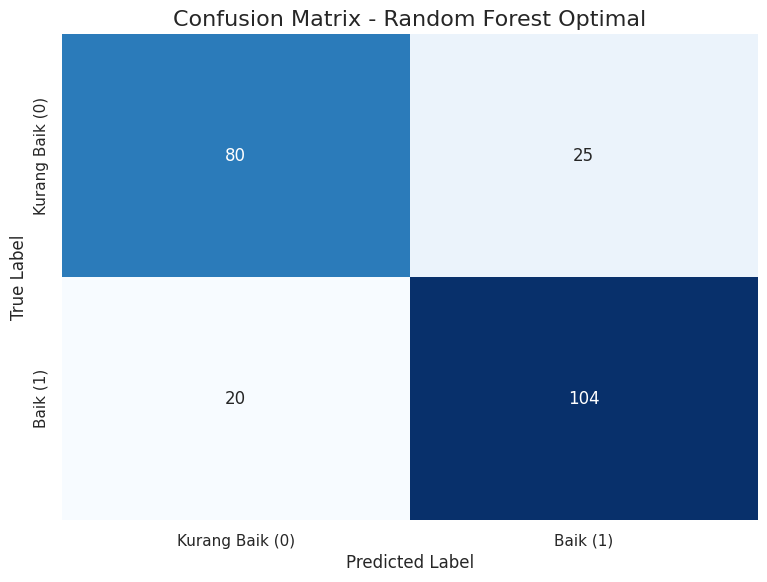

In [19]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest Optimal', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks([0.5, 1.5], ['Kurang Baik (0)', 'Baik (1)'])
plt.yticks([0.5, 1.5], ['Kurang Baik (0)', 'Baik (1)'])
plt.savefig('images/confusion_matrix.png', bbox_inches='tight')
plt.show()

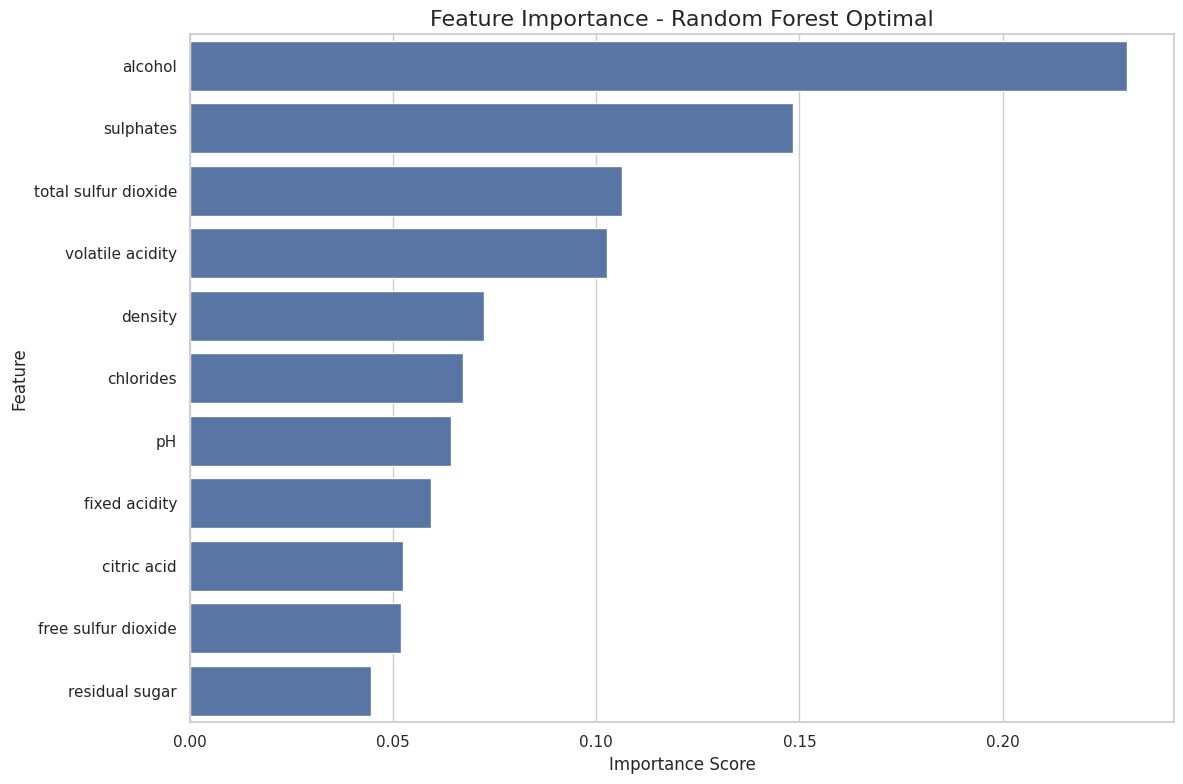

In [20]:
# Visualisasi feature importance
feature_importance = best_rf_model.feature_importances_
features = X.columns

# Membuat DataFrame untuk memudahkan visualisasi
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest Optimal', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('images/feature_importance.png', bbox_inches='tight')
plt.show()

               Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.816594   0.815385  0.854839  0.834646
1                KNN  0.733624   0.733333  0.798387  0.764479
2  Gradient Boosting  0.768559   0.766917  0.822581  0.793774
3         RF Optimal  0.803493   0.806202  0.838710  0.822134


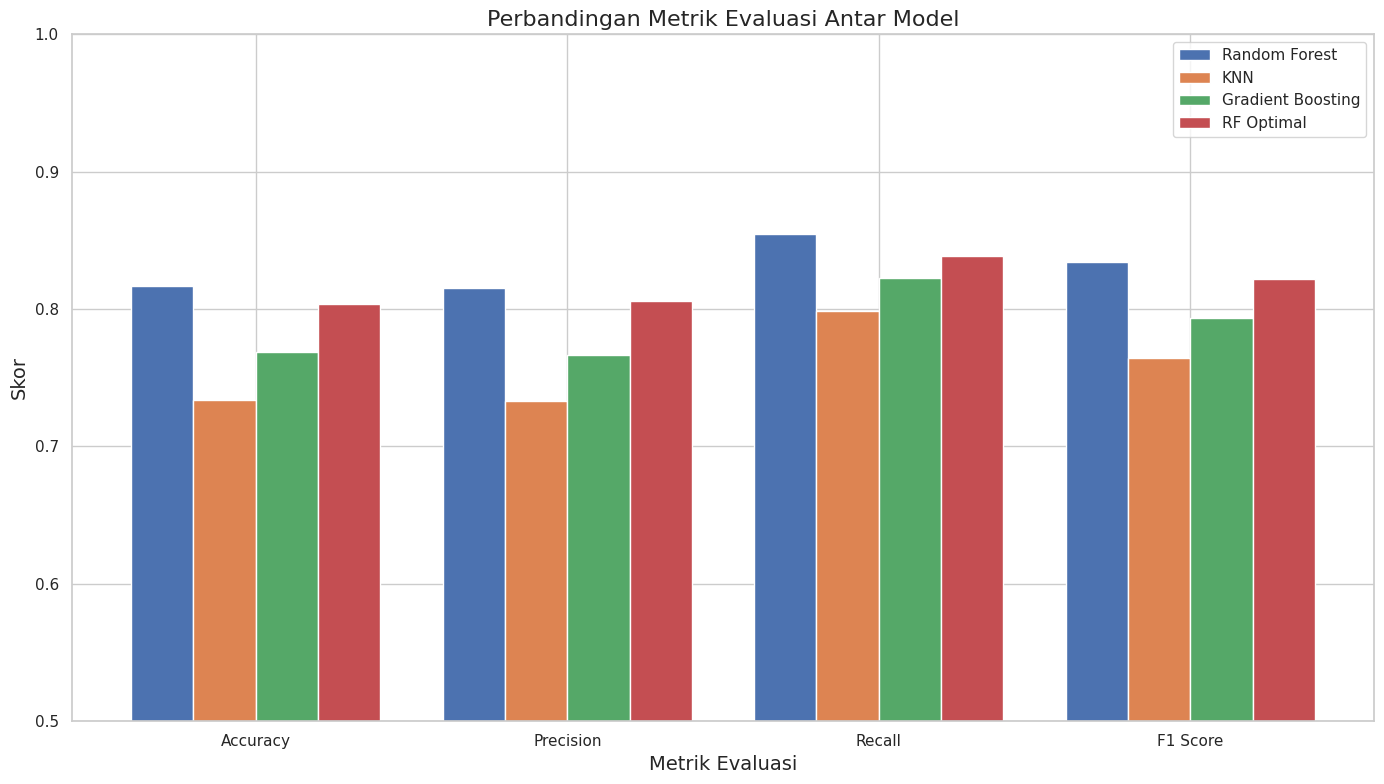

In [21]:
# Perbandingan metrik evaluasi antar model

models_evaluation = {
    'Model': ['Random Forest', 'KNN', 'Gradient Boosting', 'RF Optimal'],
    'Accuracy': [accuracy_rf, accuracy_knn, accuracy_gb, accuracy_best_rf],
    'Precision': [precision_score(y_test, y_pred_rf),
                  precision_score(y_test, y_pred_knn),
                  precision_score(y_test, y_pred_gb),
                  precision_score(y_test, y_pred_best_rf)],
    'Recall': [recall_score(y_test, y_pred_rf),
               recall_score(y_test, y_pred_knn),
               recall_score(y_test, y_pred_gb),
               recall_score(y_test, y_pred_best_rf)],
    'F1 Score': [f1_score(y_test, y_pred_rf),
                 f1_score(y_test, y_pred_knn),
                 f1_score(y_test, y_pred_gb),
                 f1_score(y_test, y_pred_best_rf)]
}

# Membuat DataFrame untuk perbandingan
metrics_df = pd.DataFrame(models_evaluation)
print(metrics_df)

# Visualisasi perbandingan metrik
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
bar_width = 0.2
index = np.arange(len(metrics))

plt.figure(figsize=(14, 8))
for i, model in enumerate(models_evaluation['Model']):
    plt.bar(
        index + i * bar_width,
        [models_evaluation[metric][i] for metric in metrics],
        bar_width,
        label=model
    )

plt.xlabel('Metrik Evaluasi', fontsize=14)
plt.ylabel('Skor', fontsize=14)
plt.title('Perbandingan Metrik Evaluasi Antar Model', fontsize=16)
plt.xticks(index + bar_width * 1.5, metrics)
plt.legend()
plt.ylim(0.5, 1.0)
plt.tight_layout()
plt.savefig('images/metrics_comparison.png', bbox_inches='tight')
plt.show()

## 6. Conclusion

Berdasarkan hasil analisis dan pemodelan, dapat disimpulkan bahwa:

1. Atribut fisikokimia yang paling berpengaruh terhadap kualitas wine adalah:
   - Kadar alkohol (alcohol)
   - Keasaman yang mudah menguap (volatile acidity)
   - Kandungan sulfat (sulphates)
   - Total sulfur dioksida (total sulfur dioxide)

2. Model Random Forest Optimal berhasil memprediksi kualitas wine dengan akurasi yang cukup baik. Ini menunjukkan bahwa model dapat digunakan dengan cukup handal untuk memprediksi kualitas wine berdasarkan atribut fisikokimianya.

3. Di antara model yang dibandingkan, Random Forest menunjukkan performa terbaik, diikuti oleh Gradient Boosting dan KNN. Hasil ini menunjukkan bahwa algoritma ensemble seperti Random Forest sangat efektif dalam menangani masalah klasifikasi kompleks seperti prediksi kualitas wine.

Hasil proyek ini dapat dimanfaatkan oleh produsen wine untuk:
- Mengoptimalkan proses produksi dengan fokus pada parameter yang paling berpengaruh terhadap kualitas.
- Mengimplementasikan sistem kontrol kualitas otomatis berbasis model machine learning.
- Mengurangi waktu dan biaya pengembangan produk baru dengan melakukan prediksi kualitas di awal proses.